# 08_Pandas 시각화

## Pandas와 pyplot의 연계
- pandas의 시리즈나 데이터프레임은 plot이라는 시각화 함수를 내장하고 있다.
- plot은 `matplotlib`를 내부적으로 임포트하여 사용한다.

## #01. 필요한 패키지 및 샘플 데이터 준비

### 1) 패키지 참조

In [2]:
import numpy
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot


### 2) 데이터 가져오기 
> 데이터 출처 : [KOSIS 국가통계포탈] (http://kosis.kr/index/index.do)

In [3]:
교통사고csv = read_csv("http://itpaper.co.kr/demo/py/traffic.csv", encoding="euc-kr")
교통사고csv

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


### 3) 데이터 전처리 (년도별 합계 구하기)

In [4]:
교통사고tmp = 교통사고csv.filter(['년도','발생건수','사망자수','부상자수'])
교통사고df = 교통사고tmp.groupby('년도').sum()
교통사고df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


## #02. 그래프에 대한 전역 환경 설정

이 코드가 다시 실행되기 전까지 모든 그래프 출력에 대해 적용된다.

In [5]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,10)

## #03. 선 그래프

### 1) 특정 컬럼에 대한 선 그래프 

DataFrame 객체의 plot() 함수를 사용한다.

#### 기본 옵션만 사용하기

**그래프 생성시 주의사항** : 모든 코드가 하나의 블록안에 구현되어야 한다.

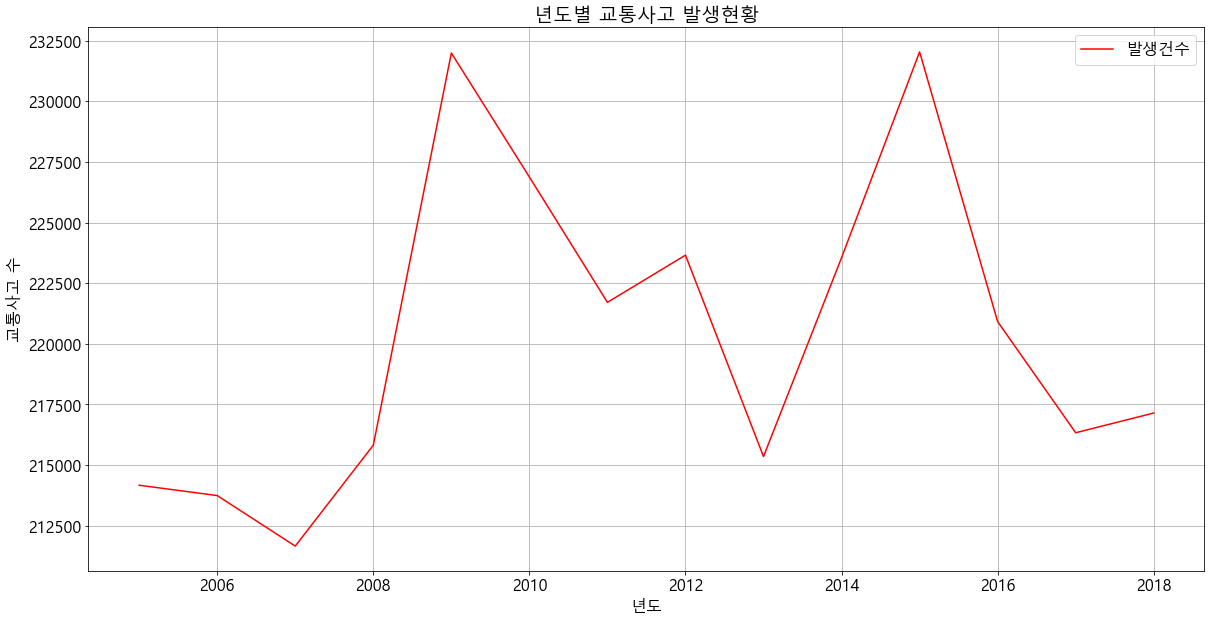

In [6]:
교통사고df['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.show()

#### x 축에 대한 텍스트 재지정

##### x 좌표를 의미할 리스트나 배열 생성

In [7]:
xpos = numpy.arange(len(교통사고df['발생건수']))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

##### x 좌표에 적용할 텍스트의 리스트 생성

In [8]:
xtext = list(교통사고df.index)

for i, v in enumerate(xtext):
    xtext[i] = "%d년" %v
    
xtext

['2005년',
 '2006년',
 '2007년',
 '2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년']

#### x 축을 지정하여 그래프 표현하기 (DataFrame의 index가 숫자로만 되어 있는 경우)

DataFrame의 index가 숫자 타입으로 구성되어 있는 경우는 index 값 자체가 x 축의 좌표를 의미한다.

x 축의 좌표 어디에 어떤 값을 출력해야 한다는 의미로 xticks() 함수를 적용.

> 기존의 index와 이를 대체해서 출력할 리스트를 `xticks()` 함수에 적용한다.

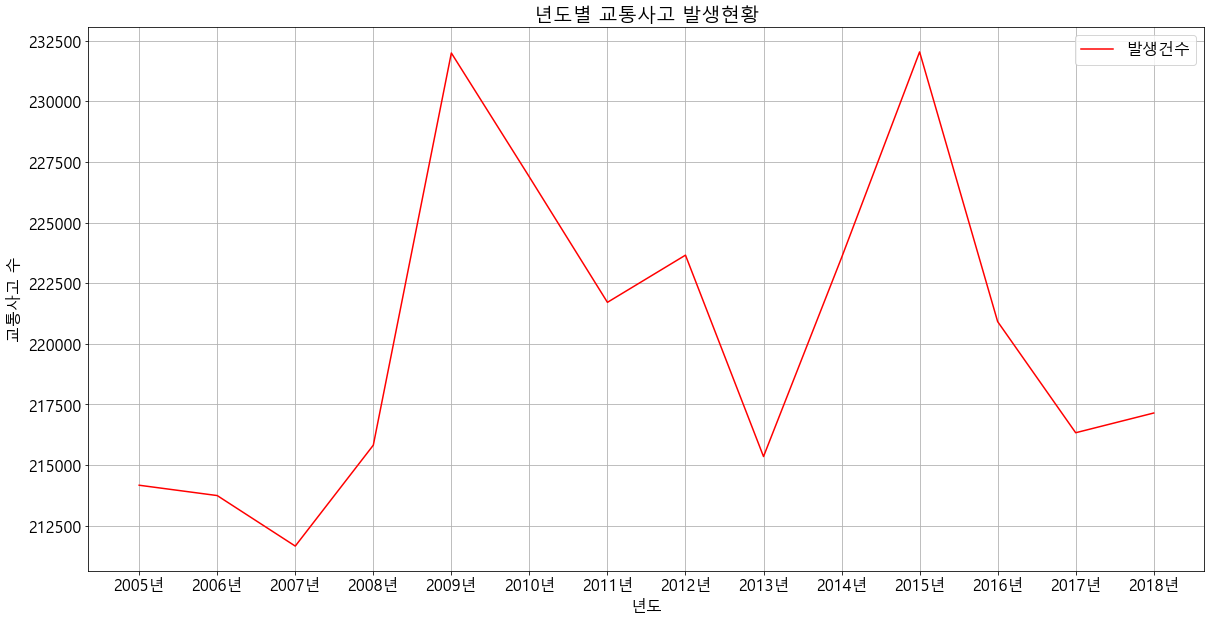

In [9]:
# 특정 컬럼에 대해서만 시각화 하기 
교통사고df['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(교통사고df.index, xtext)
pyplot.show()

#### x 축을 지정하여 그래프 표현하기 (DataFrame의 index가 숫자가 아닌 경우)

##### 인덱스가 문자열로 사용되도록 전처리

> index가 문자열로 구성된 경우를 만들기 위해서 진행한 과정임

In [10]:
교통사고copy = 교통사고df.copy();

#[2005,2006,.....2018]
현재인덱스 = list(교통사고copy.index);

indexDict = {}
#['2005년', '2006년', ... '2018년']
for i, v in enumerate(xtext):
    # `이름`의 i번째에 대응되는 항목을 `현재인덱스`에서 가져옴
    before = 현재인덱스[i];
    indexDict[before] = v
    
교통사고copy.rename(index=indexDict, inplace=True)
교통사고copy

,발생건수,사망자수,부상자수
년도,,,
2005년,214171,6376,342233
2006년,213745,6327,340229
2007년,211662,6166,335906
2008년,215822,5870,338962
2009년,231990,5838,361875
2010년,226878,5505,352458
2011년,221711,5229,341391
2012년,223656,5392,344565
2013년,215354,5092,328711


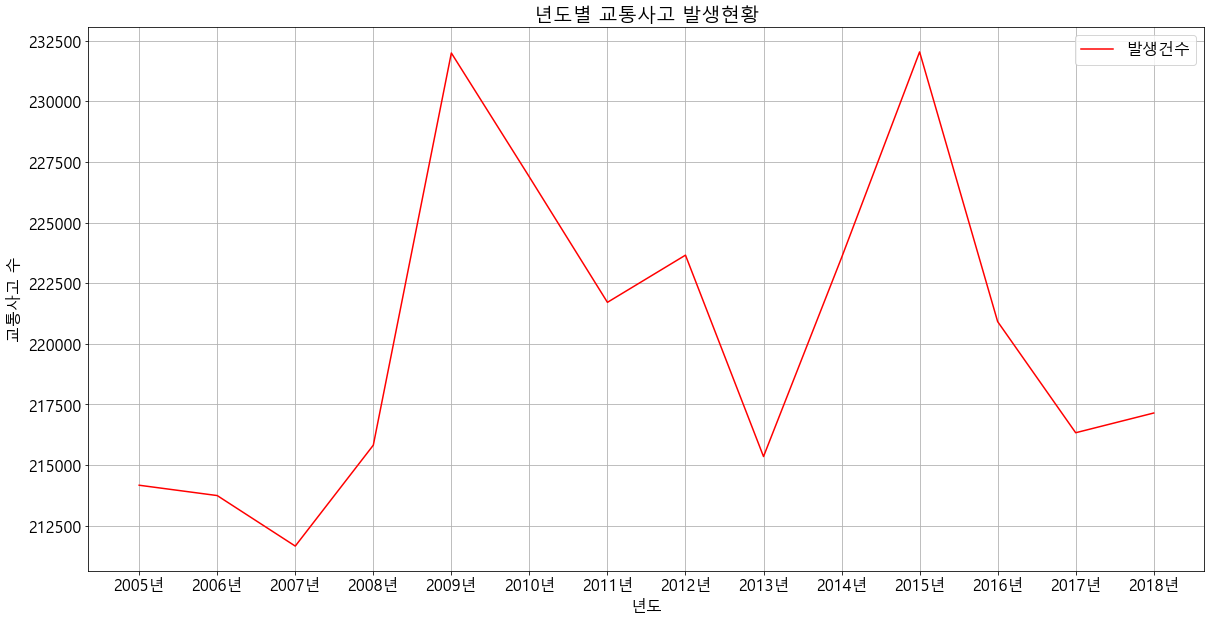

In [11]:
# 특정 컬럼에 대해서만 시각화 하기 
교통사고copy['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
# pyplot.xticks(교통사고copy.index, xtext) 오류발생
pyplot.xticks(xpos,xtext)
pyplot.show()

### 2) 전체 컬럼에 대한 다중 선 그래프 

#### `plot()` 함수의 color 파라미터를 사용하여 선 색상 지정하기 

- 단일값을 적용한 경우 모든 선이 동일한 색상으로 표시됨
- 컬럼 수 만큼 색상값을 원소로 갖는 리스트를 적용한 경우 각 선의 색상을 지정할 수 있음

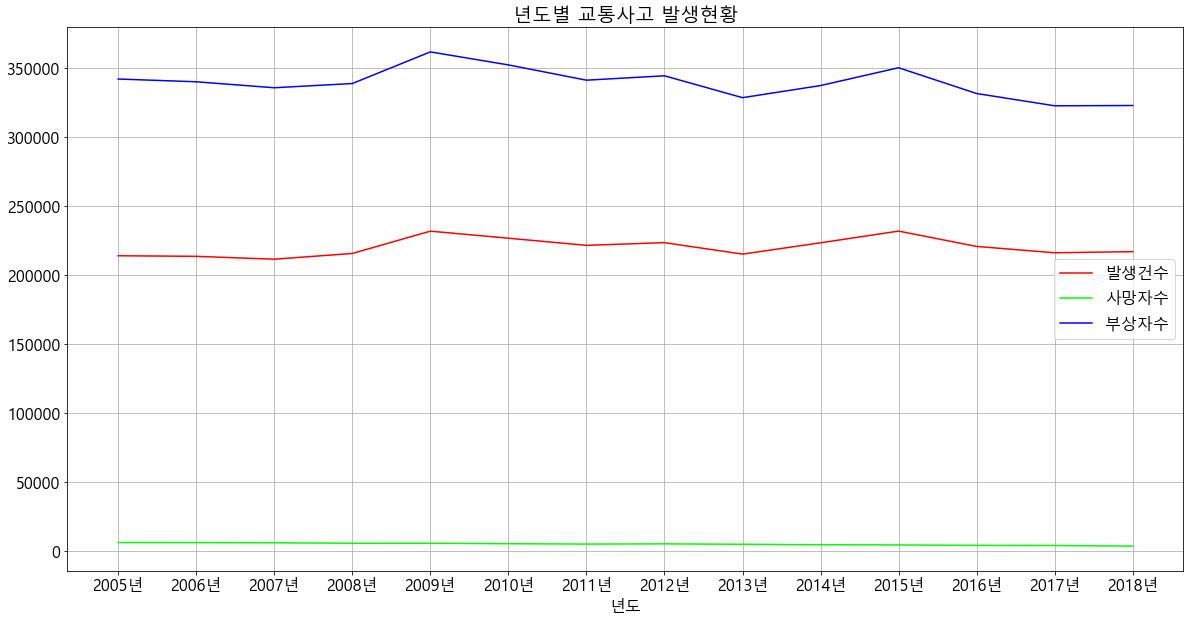

In [12]:
# 특정 컬럼에 대해서만 시각화 하기 
# 월별 교통사고.plot(color='#660000')
# 월별 교통사고.plot(color=[''#660000','#006600','#000066'])

#교통사고df.plot()
교통사고df.plot(color=['#ff0000','#00ff00','#0000ff'])
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.xticks(교통사고df.index,xtext)
pyplot.show()

## #04. 세로 막대 그래프
### 1) 특정 컬럼에 대한 시각화
#### 기본 옵션만 사용하기 

```python
데이터프레임객체['컬럼'].plot.bar()
````

* rot 파라미터는  x 축 텍스트의 각도, 기본값 90
* width 파라미터는 모든 막대가 공백없이 꽉 찬 상태를 1로 하여 비율적으로 지정, 기본값은 0.5

막대그래프는 index의 데이터 타입이 숫자, 문자열에 상관없이 x축이 0부터 시작되는 좌표계를 갖는다.

그러므로 `xticks()` 함수를 사용할 때 반드시 x 축 좌표에 대한 지정이 이루어져야 한다.

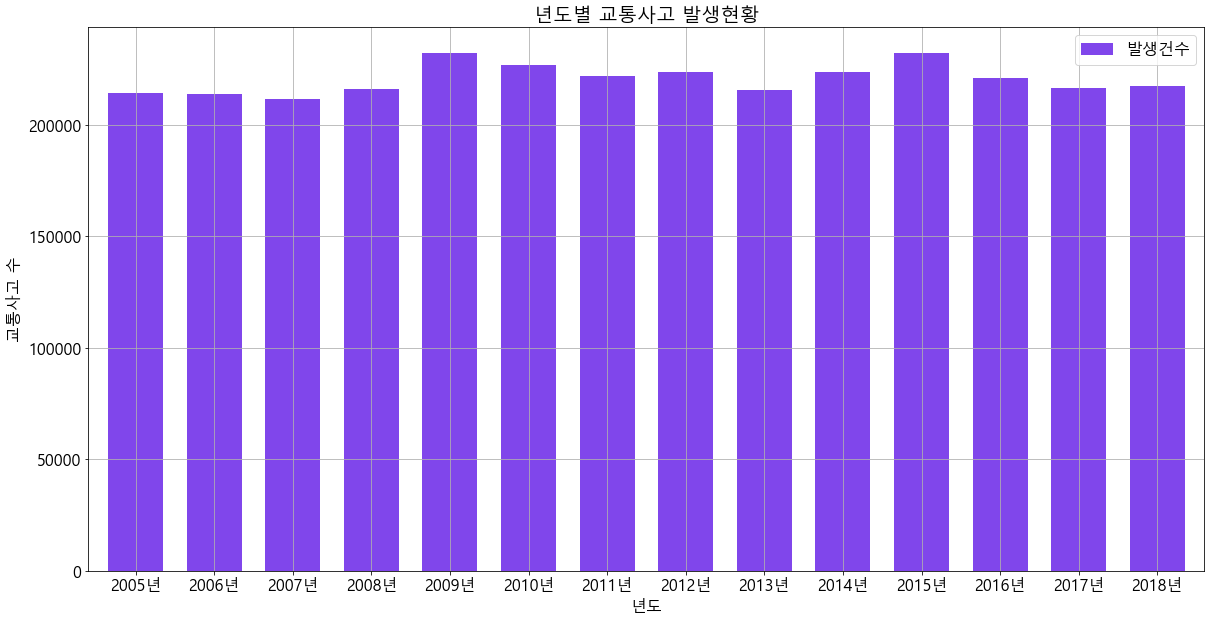

In [13]:
교통사고df['발생건수'].plot.bar(color='#8046eb', rot=0, width=0.7)
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)
pyplot.show()

#### 텍스트 출력 처리 , Y축 범위 조정

텍스트 출력은 그래프 상의 x, y 좌표를 구해서 모든 문자열을 개별적으로 출력해야 한다., 이를 위해 반복문이 사용된다.

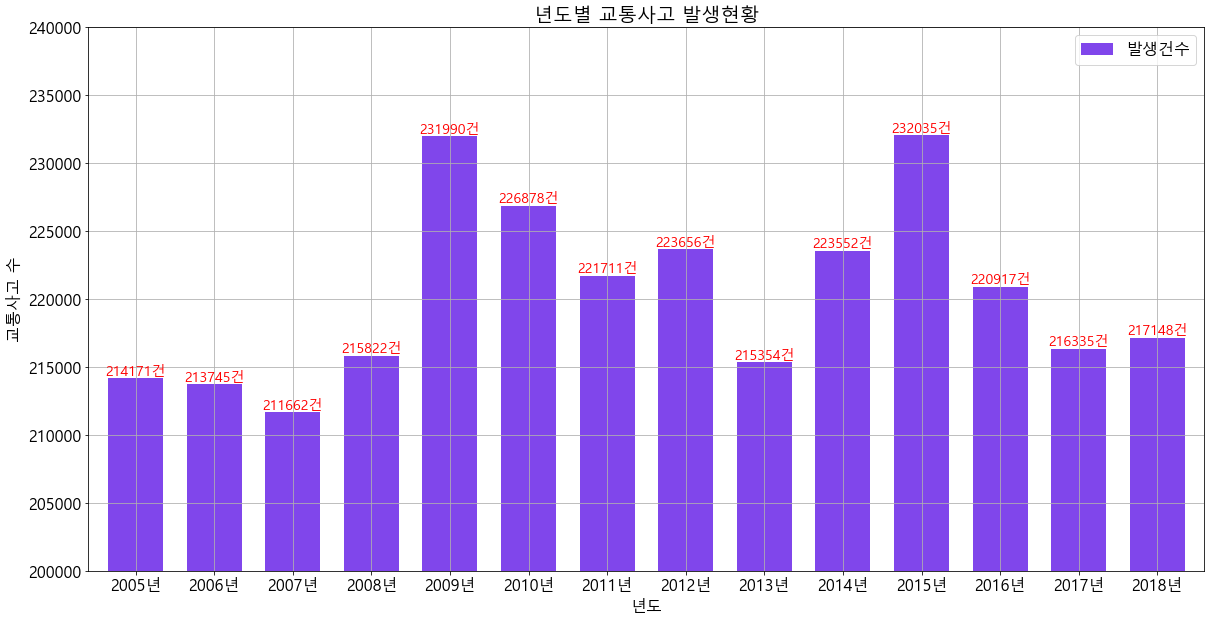

In [14]:
교통사고df['발생건수'].plot.bar(color='#8046eb', rot=0, width=0.7)
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)

# y축의 범위 설정 / x축의 범위를 설정할 경우 xlim(min, max) 사용
pyplot.ylim(200000,240000)

# 그래프에 텍스트 표시하기 
# 그래프에 표시되는 실 데이터는 y축 좌표를 의미하고, x축은 0부터 시작한느 좌표값을 갖는다.
for i, v in enumerate(list(교통사고df['발생건수'])):
    txt = "%d건" %v
    pyplot.text(i,v,txt, fontsize=14, color='#ff0000',
               horizontalalignment='center', verticalalignment='bottom')     
#   horizontalalignment='center' => 텍스트가로중심축(left,center,right), verticalalignment='bottom' => 텍스트세로중심축(top,middle,bottom)
pyplot.show()

### 2) 전체 컬럼에 대한 시각화 

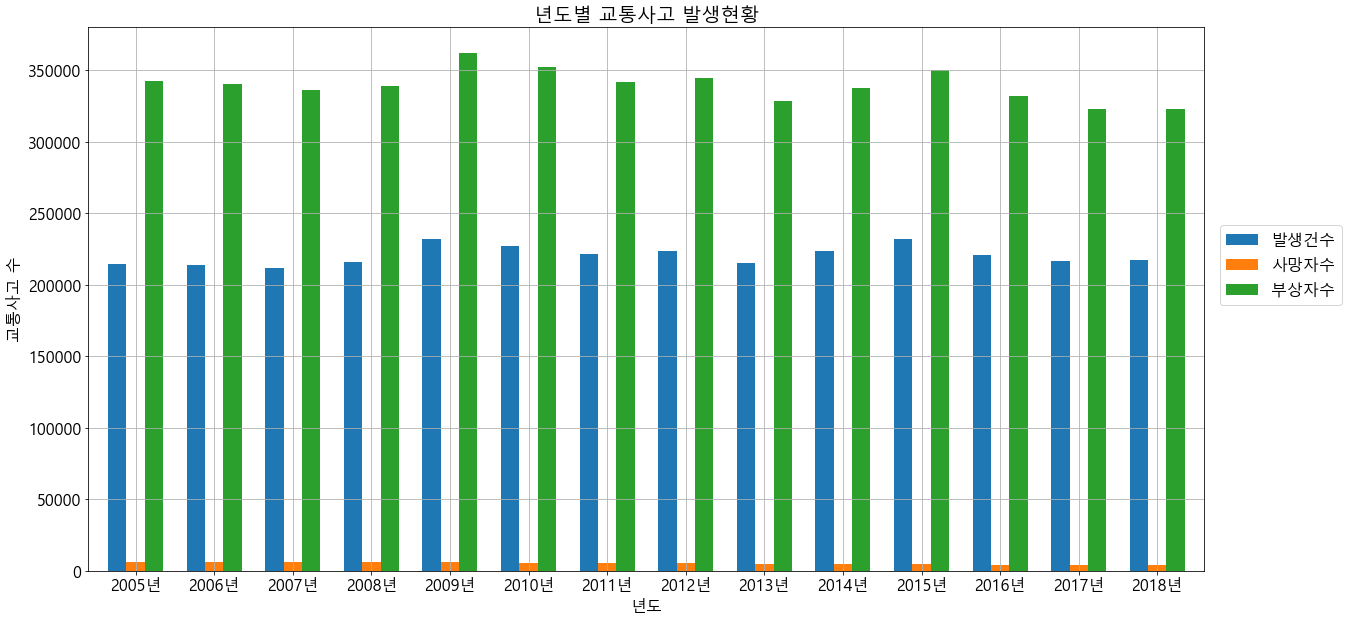

In [15]:
교통사고df.plot.bar(rot=0, width=0.7)
pyplot.grid()

# 범주의 위치를 변경할 수 있음
# pyplot.legend()
# 그래프 밖 좌측 하단
# pyplot.legend(bbox_to_anchor=(0,0))
# 그래프 밖 우측 상단
# pyplot.legend(bbox_to_anchor=(1,1))

pyplot.legend(bbox_to_anchor=(1.13,0.65))

pyplot.title("년도별 교통사고 발생현황")
pyplot.xlabel("년도")
pyplot.ylabel("교통사고 수")
pyplot.xticks(xpos, xtext)
pyplot.show()

## #05. 가로 막대 그래프
### 1) 특정 컬럼에 대한 시각화

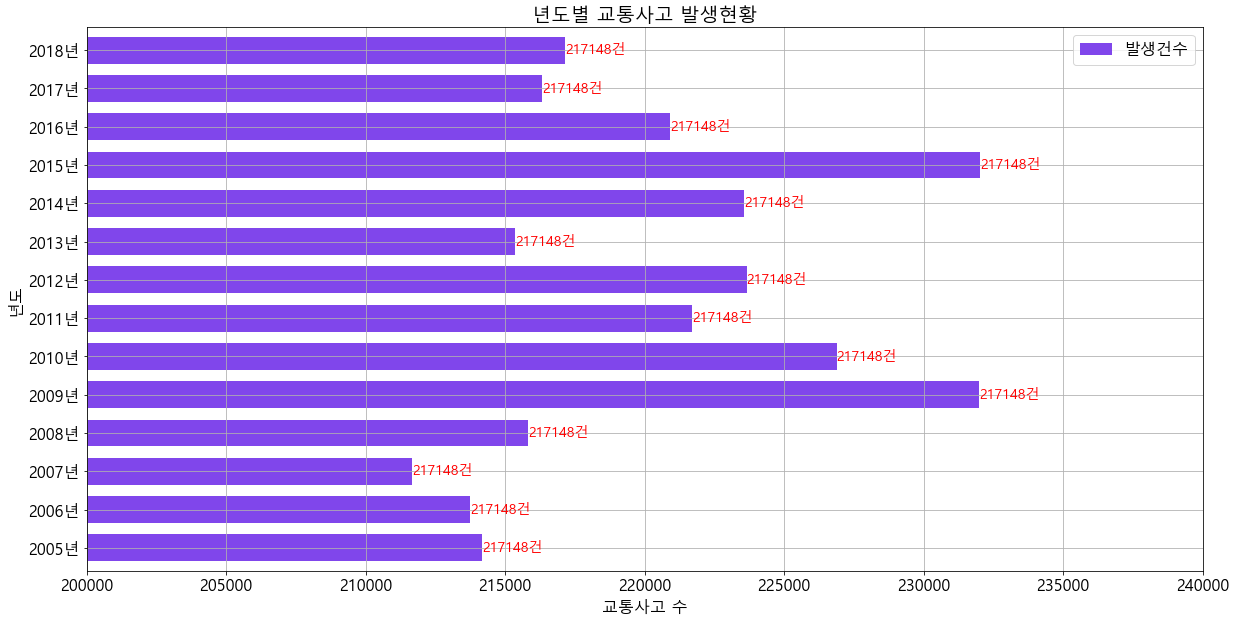

In [16]:
교통사고df['발생건수'].plot.barh(color='#8046eb', rot=0, width=0.7)
pyplot.grid()
pyplot.legend()
pyplot.title("년도별 교통사고 발생현황")
pyplot.ylabel("년도")
pyplot.xlabel("교통사고 수")
pyplot.yticks(xpos, xtext)
pyplot.xlim(200000,240000)

# 그래프에 텍스트 표시하기 
# 그래프에 표시되는 실 데이터는 y축 좌표를 의미하고, x축은 0부터 시작한느 좌표값을 갖는다.
for x, y in enumerate(list(교통사고df['발생건수'])):
    txt = "%d건" % v
    pyplot.text(y, x, txt, fontsize=14, color='#ff0000',
               horizontalalignment='left', verticalalignment='center')     
pyplot.show()

### 2) 전체 컬럼에 대한 시각화

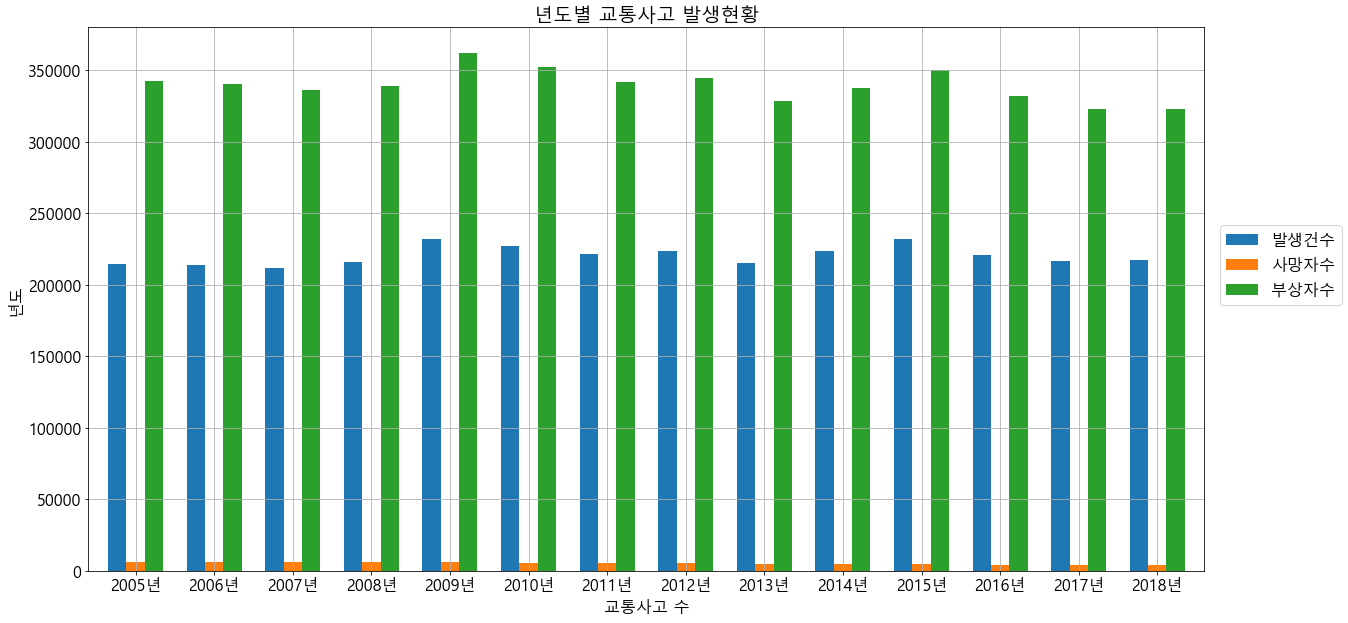

In [17]:
교통사고df.plot.bar(rot=0, width=0.7)
pyplot.grid()
pyplot.legend(bbox_to_anchor=(1.13,0.65))
pyplot.title("년도별 교통사고 발생현황")
pyplot.ylabel("년도")
pyplot.xlabel("교통사고 수")
pyplot.xticks(xpos, xtext)
pyplot.show()

## #06. 파이 그래프 

데이터프레임의 특정 컬럼을 지정하여 전체를 기준으로 어느정도의 비율을 차지하는지를 시각화 하는 그래프 

### 1) 파이 그래프 기본형

In [18]:
# 각 컬럼별로 평균 구하기 
교통사고평균 = 교통사고df.mean()
교통사고평균

발생건수    220355.428571
사망자수      5245.428571
부상자수    339415.214286
dtype: float64

In [19]:
# 구해진 결과를 사용해서 데이터프레임 생성
교통사고평균df = DataFrame(교통사고평균, columns=['교통사고'])
교통사고평균df

,교통사고
발생건수,220355.428571
사망자수,5245.428571
부상자수,339415.214286


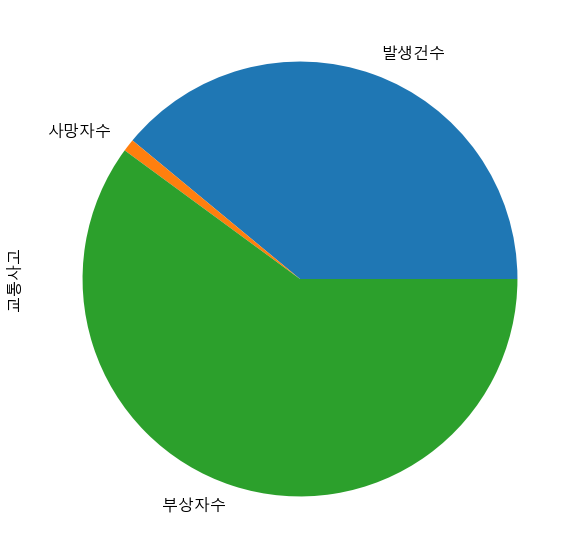

In [20]:
# 데이터프레임의 특정 컬럼에 대한 파이그래프 표시 -> 반드시 특정 컬럼을 지정해야 함
교통사고평균df['교통사고'].plot.pie()
pyplot.show()

### 2) 파이 그래프의 옵션

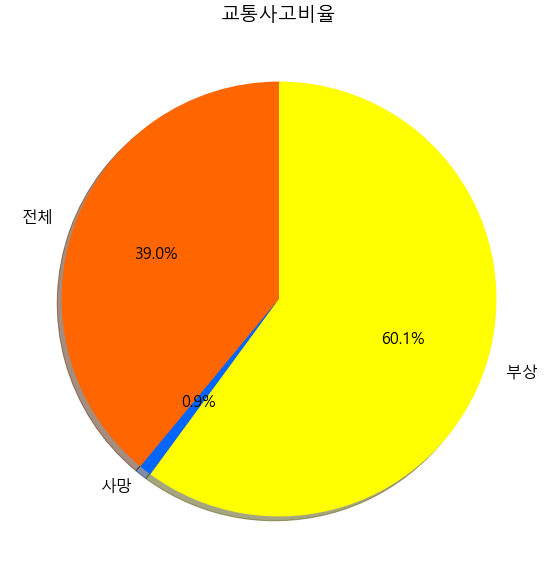

In [21]:
교통사고평균df['교통사고'].plot.pie(labels=['전체','사망','부상'],
                         colors=['#ff6600','#0066ff','#ffff00'],
                         autopct='%0.1f%%',
                         shadow=True,
                         startangle=90)
# 제목지정
pyplot.title("교통사고비율")

# y축 라벨 표시 안함
pyplot.ylabel(None)
pyplot.show()

### 3) 출력값에 대한 사용자 정의 함수 만들기 

`pie()` 함수가 그래프의 조각 수 만큼 지정된 함수를 호출하면서 각 조각이 차지하는 비율을 파라미터로 전달한다.

지정된 함수는 파라미터로 전달되는 비율을 통해서 몇 번째 항목에 대한 데이터인지를 역으로 추적하여 표시할 
텍스트를 구성한 후 리턴해야 한다.

38.99984955787659
0
0.9283680468797684
1
60.071784257888794
2


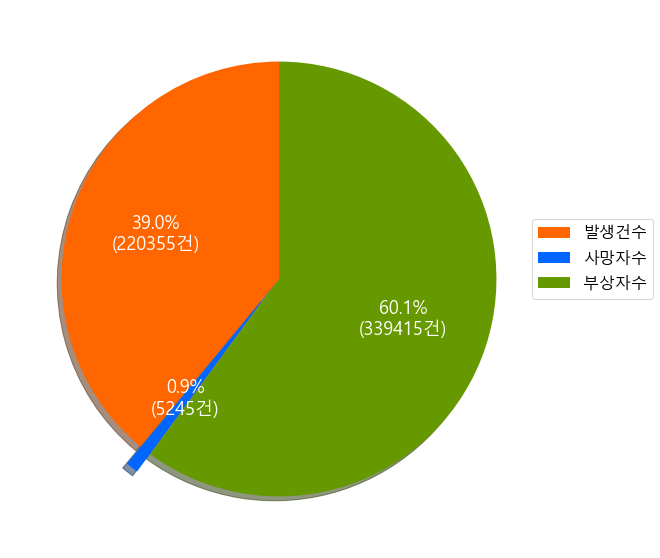

In [22]:
# 몇번째 섹션인지를 카운트할 변수
위치 = 0  

# pct는 각 섹션의 비율, values는 전체 데이터 리스트 
def make_autopct(비율):
    global 위치
    global 교통사고평균df
    
    print(비율)
    print(위치)
    
    위치 += 1
    합계 = 교통사고평균df['교통사고'].sum()
    수치 = int(round(비율*합계/100.0))     # 비율과 총합을 사용해서 수치값을 역산한다.
    str = "%0.1f%%\n(%d건)" %(비율, 수치)  # 그래프의 각 섹션에 출력할 문자열 만들기 
    return str

# 파이 그래프의 각섹션 수 만큼 `make_autopct`함수가 호출 되도 이 함수 안에서 각 섹션에 출력할 텍스트를 만들어서 리턴한다.
교통사고평균df['교통사고'].plot.pie(labels=None,
                          textprops = {'color':'#ffffff', 'fontsize':18},
                          colors = ['#ff6600','#0066ff','#669900'],
                          explode = [0.0, 0.1, 0.0],
                          autopct = make_autopct,
                          shadow=True,
                          startangle=90)

# y축 라벨 표시 안함
pyplot.ylabel(None)

# 범주 지정
# labels -> 각 섹션별 제목 
# bbox_to_anchor(x,y) -> 0,0를 기준으로 범주의 위치 (2차원 좌표)
pyplot.legend(labels=list(교통사고평균df.index), bbox_to_anchor=(0.95, 0.625))

pyplot.show()

## #07. 산점도 그래프

- 두 변수 간의 영향력을 보여주기 위해 가로 축과 세로 축에 대한 **데이터 포인트**를 그리는 데 사용한다.
- **데이터 포인트**들이 뭉쳐 있을 수록 두 변수간의 관련성 정도가 높다고 해석한다.

### 예) 교통사고 발생건수와 부상자 수 간의 상관관계
- **첫번째 변수** : 교통사고 발생건 수 
- **두번째 변수** : 교통사고 부상자 수 

이 두 변수의 상관관계를 표현한 그래프를 산점도로 표현할 수 있다.

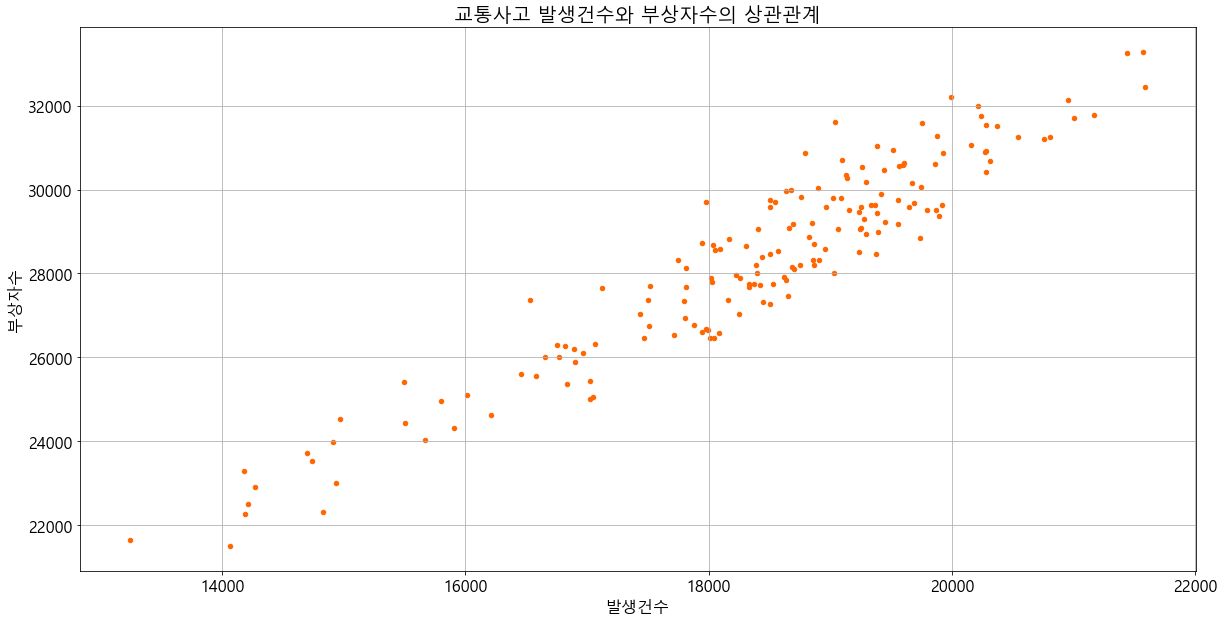

In [23]:
# marker -> o, v, ^, < >, 8, s, p, *, h ,H, D, d, P, X
교통사고csv.plot.scatter(x='발생건수', y='부상자수', color='#ff6600', marker='o')
pyplot.grid()
pyplot.title("교통사고 발생건수와 부상자수의 상관관계")
pyplot.ylabel("부상자수")        # y축 라벨
pyplot.xlabel("발생건수")
pyplot.show()

### 산점도 그래프 해석

점들이 많이 모여 있을 수록 두 변수간의 관계성이 높고, 점들이 흩어져 있을 수 록 두 변수간의 관계성이 적다고 해석한다.

#### 정의관계

x가 증가 할 때 y도 증가하는 직선에 가까운 형태

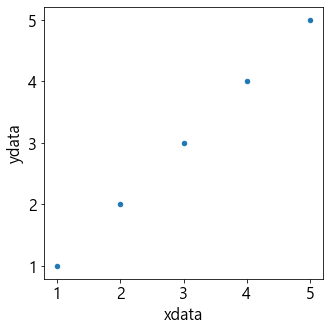

In [24]:
pyplot.rcParams["figure.figsize"] = (5,5)
pyplot.rcParams["font.family"] = 'Malgun Gothic'

df = DataFrame({'xdata':[1,2,3,4,5], 'ydata':[1,2,3,4,5]})
df.plot.scatter(x='xdata', y='ydata')
pyplot.show()

#### 역의 관계

x가 증가할때 y는 감소하는 형태

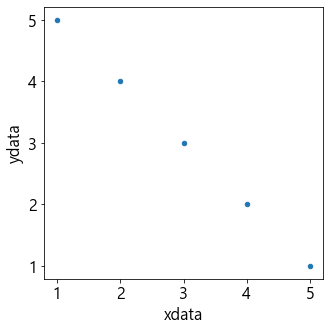

In [25]:
df = DataFrame({'xdata':[1,2,3,4,5], 'ydata':[5,4,3,2,1]})
df.plot.scatter(x='xdata', y='ydata')
pyplot.show()

#### 선형 관계

점들이 직선에 가깝게 배치된 형태

> 앞에서 제시한 두 샘플이 선형 관계에 속한다.

#### 비선형 관계

점들이 직선이 아닌 형태로 배치된 형태 

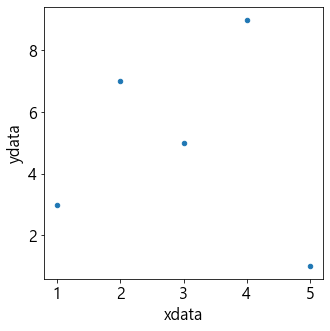

In [26]:
df = DataFrame({'xdata':[1,2,3,4,5], 'ydata':[3,7,5,9,1]})
df.plot.scatter(x='xdata', y='ydata')
pyplot.show()

#### 상관분석

연속형 변수로 측정된 두 변수간의 선형적 관계를 분석하는 관계

연속형 변수는 산술 평균을 계산할 수 있는 숫자형의 데이터이며, 선형적 관계라 함은 흔히 비례식이 성립되는 관계를 말한다.

> 예를들어 A변수가 증가함에 따라 B변수도 증가되는지 혹은 감소하는지를 분석하는 것이다.

상관분석은 두 변수간의 선형적 관계에 초점을 두고 있으며 **선형관계를 갖는가? 어느방향으로 형성되어 있는가? 그 관계의 정도는 얼마나 큰가?**와 

같은 질문을 던지며 결과 해석을 수행한다.

#### 상관계수

상관분석에서 두 변수 사이의 선형적인 관계정도를 나타내기 위해 사용되는 값.

> 수하적인 공식에 의해 구해야 한다.

상관분석에는 측정 데이터에 따라 피어슨 상관분석, 상곤분석 등의 여러가지 분석방법이 있지만, 일반적으로 피어슨 상관계수를 의미한다.

| 상관계수 | 설명 |
| -------- | ---- |
|  1  | 직선형 정의 관계 |
|  -1 | 직선형 역의 관계 |
|  0  | 모든 점들이 분산되어 있는 형태 |

> 상관계수 1과 0 사이에 소수점 형태로 점의 분포도를 표현한다.

### 추세선

차트 위에 그려진 대각선들.

이는 특정 데이터 지점을 연결하며 분석가가 보다 쉽게 데이터의 움직임을 시각화하고 추세를 알 수 있게 한다.

추세선은 기술적 분석의 가장 기초적인 도구 중 하나로 간주된다.

#### numpy를 활용한 추세선 방적식 구하기

In [28]:
x = 교통사고csv['발생건수']
y = 교통사고csv['부상자수']

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드
z = numpy.polyfit(x,y,1)  # (x,y,차원) 정의
f = numpy.poly1d(z)       # 1차원 다항식에 대한 연산을 캐슐화

추세선을 포함한 산점도 그래프

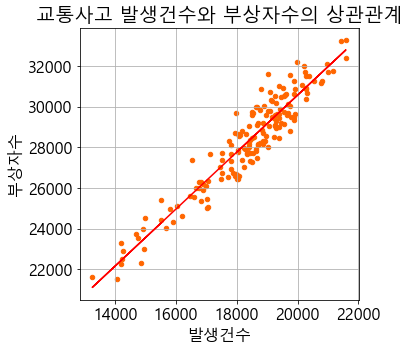

In [30]:
교통사고csv.plot.scatter(x='발생건수', y='부상자수', color='#ff6600', marker='o')
pyplot.grid()
pyplot.title("교통사고 발생건수와 부상자수의 상관관계")
pyplot.ylabel("부상자수")        # y축 라벨
pyplot.xlabel("발생건수")        # x축 라벨 
pyplot.plot(x,f(x),'#ff0000')
pyplot.show()